### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import Birch,KMeans
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('Loan.csv')
print('Number of Records:', len(df))
df.head()

Number of Records: 150302


,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450
1,F,0.0,403,500,225
2,F,0.0,408,1000,450
3,F,0.0,408,2000,900
4,F,0.0,411,5000,2250


### Summary Statistics 

In [3]:
df.describe()

,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
count,150302.000000,150302.000000,150302.000000,150302.000000
mean,0.183538,672.023266,13427.080145,6042.186065
std,0.137226,69.129157,9468.345958,4260.755681
min,0.000000,371.000000,500.000000,225.000000
25%,0.090000,647.000000,6000.000000,2700.000000
50%,0.160000,684.000000,11000.000000,4950.000000
75%,0.240000,714.000000,19000.000000,8550.000000
max,1.030000,869.000000,44000.000000,19800.000000


### Histograms

When examining the histograms of the four variables no variable has a normal distribution. Also, Interest and Request Amount have the same shape.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fbad4e0>,
      dtype=object)

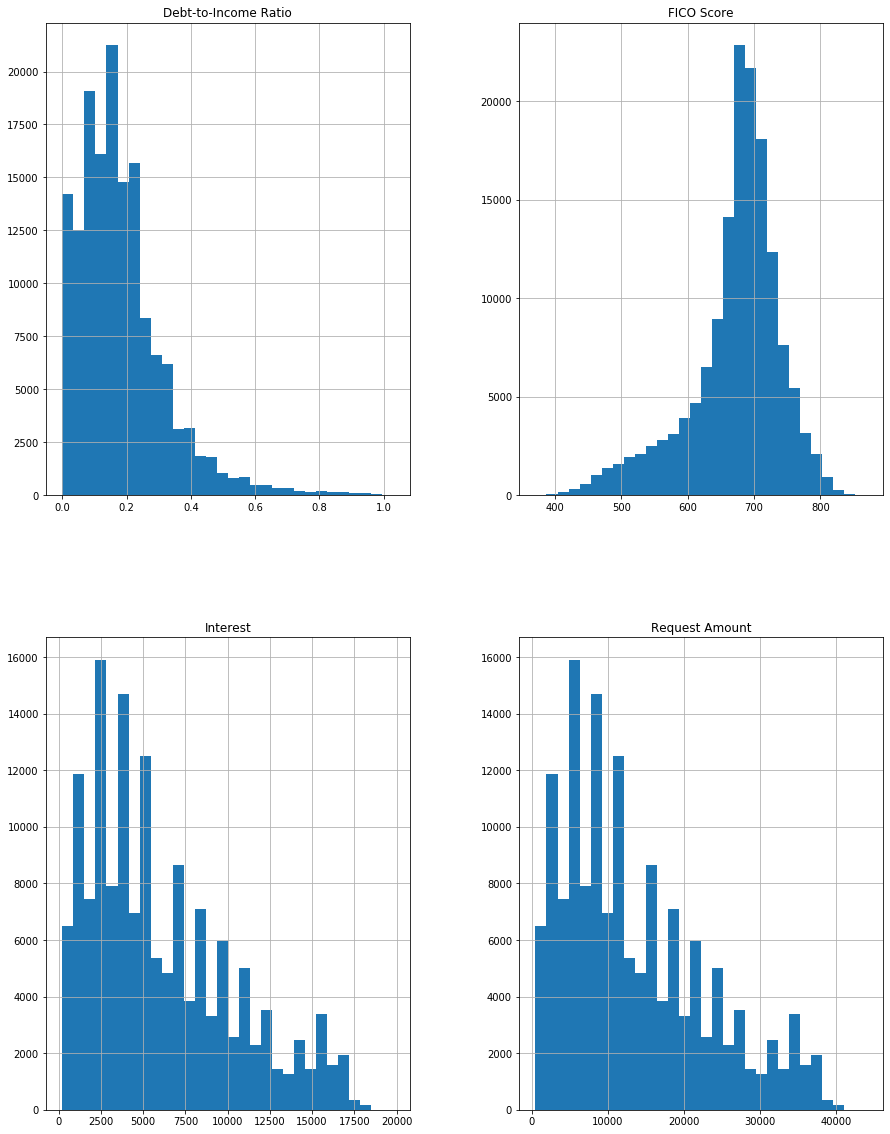

In [4]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,bins = 30)

### Correlation plot

The correlation of the four variables shows that Interest and Request Amount are extremely positively correlated, which explains the same shape in the histograms above.  

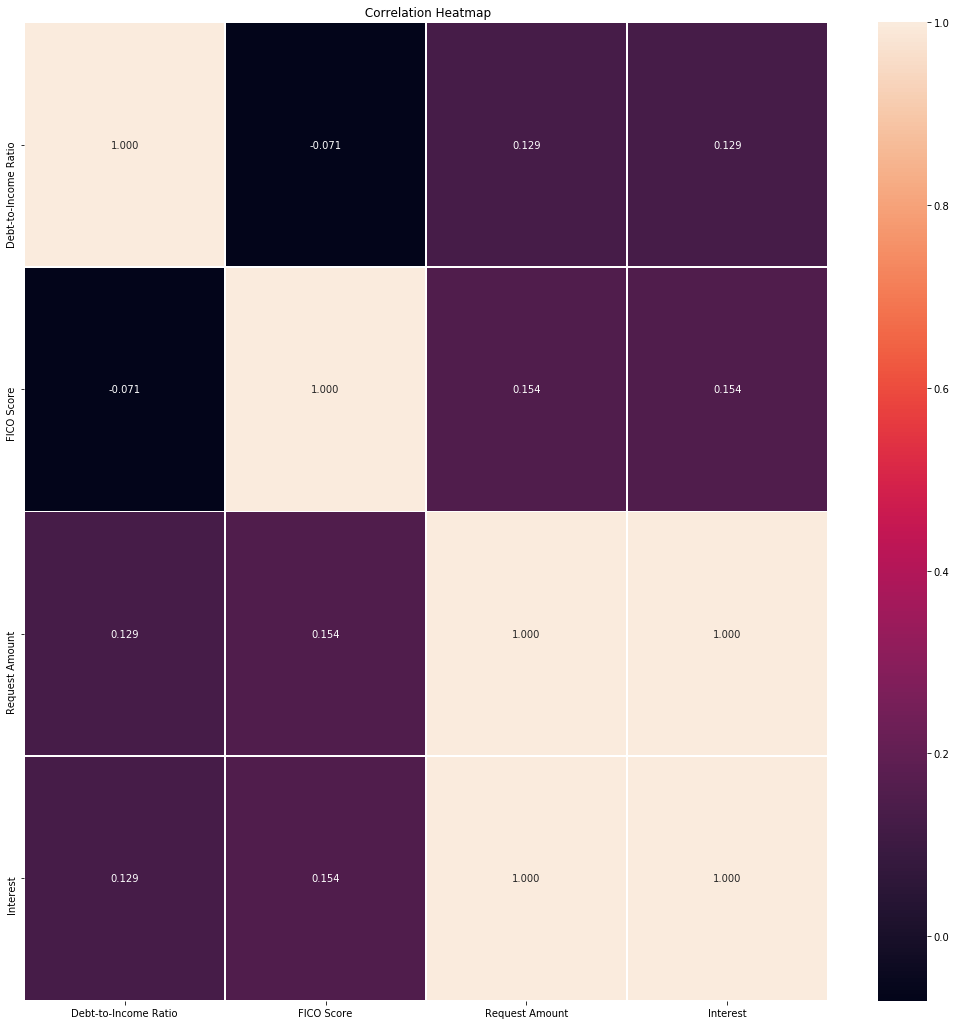

In [5]:
cor = df.corr()
f,ax = plt.subplots(figsize = (18,18))
plt.title(' Correlation Heatmap')
sns.heatmap(cor, annot = True, linewidths = .5, fmt='.3f', ax = ax)

### Scatter Plot 

The scatter plot below shows the relationship between Interest and Amount Request. Has one increase so does the other variable.  

Text(0.5, 1.0, 'Request Amount vs. Interest')

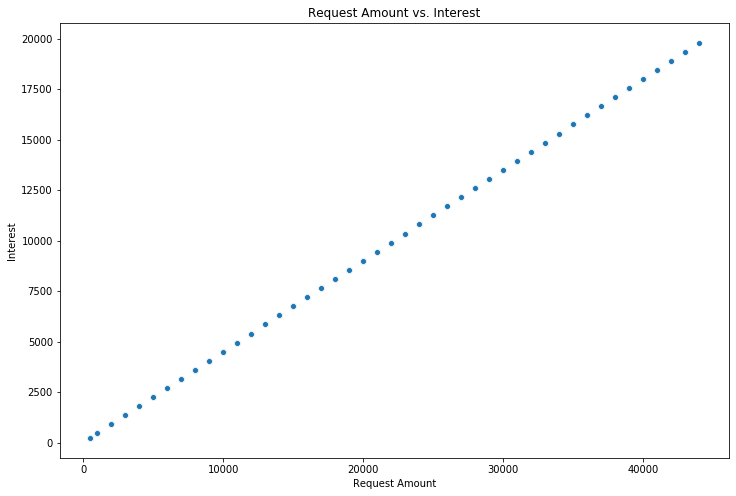

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Request Amount'], df['Interest'])
plt.title('Request Amount vs. Interest')

### Droping the Interest variable

Interest was drop because it shows the same information as the Request Amount. As one goes up so does the other variable. 

In [7]:
df1 = df.copy()
df1.drop('Interest', axis = 1, inplace = True)
df1.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount
0,F,0.0,397,1000
1,F,0.0,403,500
2,F,0.0,408,1000
3,F,0.0,408,2000
4,F,0.0,411,5000


### Spliting Data

Data was split for clustering. I used test_train_split to remove Approval from the model because it is not needed when clustering the Loan data. 

In [8]:
X = df1.drop('Approval', axis = 1)
y = df1[['Approval']]
X_train_1, X_test_1, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
len(X_train_1), len(X_test_1)

(112726, 37576)

## Clustering 

### Model 1

#### Branching factor 100, threshold = 0.2, n_clusters  =  2

In [9]:
train_1 = X_train_1.copy()
test_1 = X_test_1.copy()
len(train_1), len(test_1)

(112726, 37576)

In [10]:
sc =  MinMaxScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

In [11]:
birch = Birch(branching_factor=100,threshold=0.2,n_clusters = 2)
birch.fit(X_train)
pred = birch.predict(X_train)

In [12]:
df_pred = pd.DataFrame(pred, columns = ['Pred'])
df_pred['Pred'].value_counts()

1    86935
0    25791
Name: Pred, dtype: int64

The cluster plot below shows that cluster 0 are customers with higher Request Amounts than clustered 1. 

Train Cluster0 %: 77.1206287812927
Train Cluster1 %: 22.87937121870731


Text(0.5, 1.0, 'Birch with 2 Clusters Train Data')

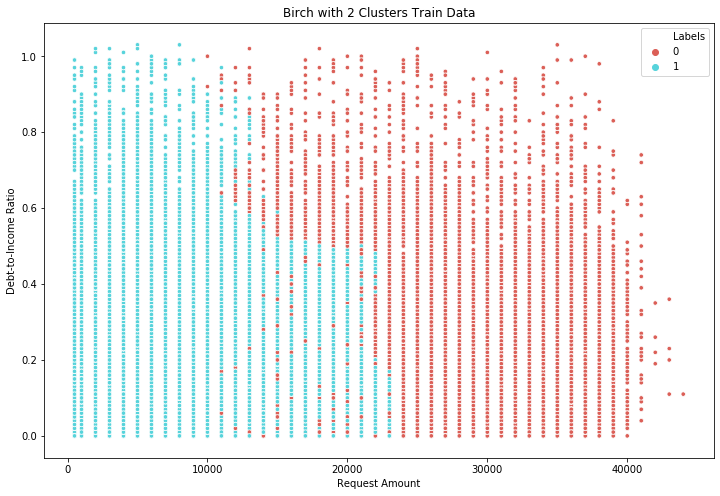

In [13]:
cluster0 = (86935/len(X_train)) * 100
cluster1 = (25791/len(X_train)) * 100
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)

train_1['Labels'] = birch.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_1['Request Amount'], train_1['Debt-to-Income Ratio'], hue=train_1['Labels'],  s=20,
                palette=sns.color_palette('hls', 2))
plt.title('Birch with 2 Clusters Train Data')

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train, pred, metric='euclidean', random_state = 0)
score

0.3776932694478369

In [15]:
pred_test = birch.predict(X_test)
df_pred_test = pd.DataFrame(pred_test, columns = ['Pred'])
df_pred_test['Pred'].value_counts()

1    29059
0     8517
Name: Pred, dtype: int64

The cluster plot for the test data below follows the same shape as the train. Cluster 0 are customers with higher Request Amounts than clustered 1. 

Teat Cluster0 %: 77.33393655524803
Test Cluster1 %: 22.66606344475197


Text(0.5, 1.0, 'Birch with 2 Clusters Test Data')

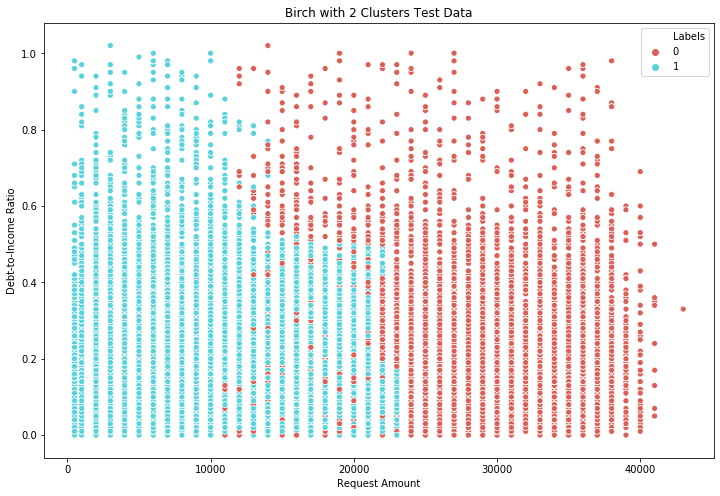

In [16]:
cluster0_test = (29059/len(X_test)) * 100
cluster1_test = (8517/len(X_test)) * 100
print('Teat Cluster0 %:', cluster0_test)
print('Test Cluster1 %:', cluster1_test)

test_1['Labels'] = pred_test
plt.figure(figsize=(12, 8))
sns.scatterplot(test_1['Request Amount'], test_1['Debt-to-Income Ratio'], hue=test_1['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('Birch with 2 Clusters Test Data')

In [17]:
score2 = silhouette_score(X_test, pred_test, metric='euclidean')
score2

0.3803225093221911

The average silhouette score shows that the two clusters are similar for the test and train data and the percentage of the data between the clusters are the same. This is the ideal outcome. The silhouette score points to the model providing some evidence of the reality of the clusters in the data. 

In [18]:
print('Average Silhouette Score')
print('Train:', score)
print('Test:', score2)
print('--'*40)
print('Cluster %')
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Teat Cluster0 %:', cluster0_test)
print('Test Cluster1 %:', cluster1_test)

Average Silhouette Score
Train: 0.3776932694478369
Test: 0.3803225093221911
--------------------------------------------------------------------------------
Cluster %
Train Cluster0 %: 77.1206287812927
Train Cluster1 %: 22.87937121870731
Teat Cluster0 %: 77.33393655524803
Test Cluster1 %: 22.66606344475197


The mean and standard deviation show that the test and train data for each cluster are similar. Cluster 0 has a high debt-to-income ratio, low FICO Score, and a large Request Amount. Cluster 1 has a low debt-to-income ratio, high FICO Score, and a small Request Amount.

In [19]:
print('Train')
print('Mean')
print(train_1.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(train_1.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))
print('--'*40)
print('Test')
print('Mean')
print(test_1.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(test_1.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))


Train
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.221038  663.944516    26842.735838
1                   0.172267  674.293484     9456.990855
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.164428   68.850628     6958.632925
1                   0.125742   69.175566     5715.883291
--------------------------------------------------------------------------------
Test
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.222344  664.738171    26914.523893
1                   0.172598  674.536942     9444.285763
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.166544   68.470259     7010.725975
1    

### Model 2

#### n_cluster = 3 with a Branching  Factor 500 and Threshold=0.2

In [20]:
train_2 = X_train_1.copy()
test_2 = X_test_1.copy()
len(train_2), len(test_2)

(112726, 37576)

In [21]:
sc =  MinMaxScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

birch = Birch(branching_factor=500,threshold=0.2,n_clusters = 3, copy=True)
birch.fit(X_train)
pred_3 = birch.predict(X_train)

In [22]:
df_pred_3 = pd.DataFrame(pred_3, columns = ['Pred'])
df_pred_3['Pred'].value_counts()

0    86935
1    23456
2     2335
Name: Pred, dtype: int64

The cluster plot below shows that cluster 0 are customers with a low Request Amount. Cluster 1 are customers with high Request Amounts and lower debt-to-income ratios. Cluster 2 has high Request Amounts and high debt-to-income ratios.

Train Cluster0 %: 77.1206287812927
Train Cluster1 %: 20.80797686425492
Train Cluster2 %: 2.071394354452389


Text(0.5, 1.0, 'Birch with 3 Clusters Train Data')

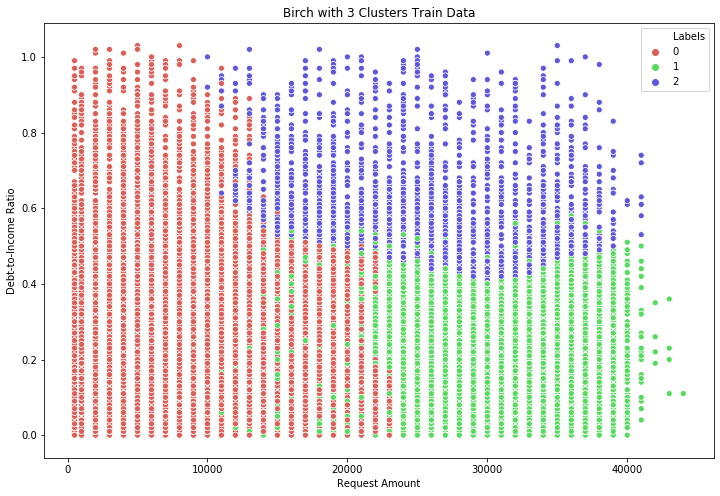

In [23]:
cluster0 = (86935/len(X_train)) * 100
cluster1 = (23456/len(X_train)) * 100
cluster2 = (2335/len(X_train)) * 100
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Train Cluster2 %:', cluster2)

train_2['Labels'] = birch.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_2['Request Amount'], train_2['Debt-to-Income Ratio'], hue=train_2['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Birch with 3 Clusters Train Data')

In [24]:
score3 = silhouette_score(X_train, pred_3, metric='euclidean', random_state = 0)
score3

0.3514686476689018

In [25]:
pred_test_3 = birch.predict(X_test)
df_pred_test_3 = pd.DataFrame(pred_test_3, columns = ['Pred'])
df_pred_test_3['Pred'].value_counts()

0    29059
1     7737
2      780
Name: Pred, dtype: int64

The cluster plot below of the test data show the same picture as the training data. Cluster 0 are customers with lower Request Amounts. Cluster 1 are customers with high Request Amounts and lower debt-to-income ratios. Cluster 2 have high Request Amounts and high debt-to-income ratios.

Teat Cluster0 %: 77.33393655524803
Test Cluster1 %: 20.59027038535235
Test Cluster2 %: 2.075793059399617


Text(0.5, 1.0, 'Birch with 3 Clusters Test Data')

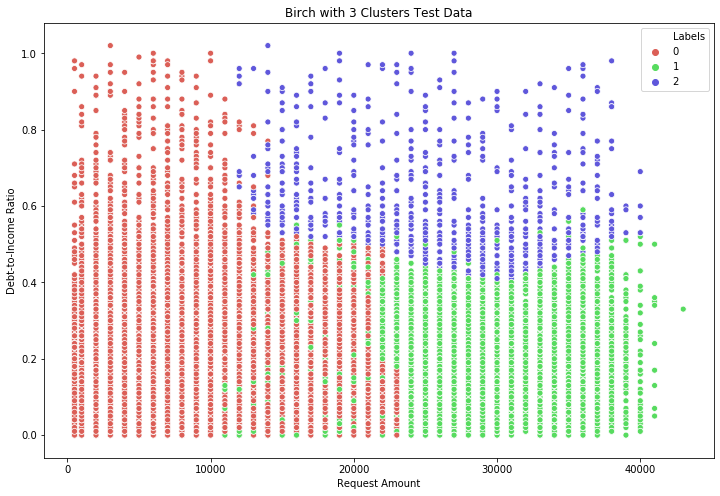

In [26]:
cluster0_test_3 = (29059/len(X_test)) * 100
cluster1_test_3 = (7737/len(X_test)) * 100
cluster2_test_3 = (780/len(X_test)) * 100
print('Teat Cluster0 %:', cluster0_test_3)
print('Test Cluster1 %:', cluster1_test_3)
print('Test Cluster2 %:', cluster2_test_3)

test_2['Labels'] = pred_test_3
plt.figure(figsize=(12, 8))
sns.scatterplot(test_2['Request Amount'], test_2['Debt-to-Income Ratio'], hue=test_2['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Birch with 3 Clusters Test Data')

In [27]:
score2_3 = silhouette_score(X_test, pred_test_3, metric='euclidean')
score2_3

0.35429825037265256

The average silhouette score shows that the three clusters are similar for the test and train data and the percentage of the data between the clusters are the same. This is the ideal outcome. The silhouette score points to the model providing some evidence of the reality of the clusters in the data.

In [28]:
print('Average Silhouette Score')
print('Train:', score3)
print('Test:', score2_3)
print('--'*40)
print('Cluster %')
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Train Cluster2 %:', cluster2)
print('Teat Cluster0 %:', cluster0_test_3)
print('Test Cluster1 %:', cluster1_test_3)
print('Test Cluster2 %:', cluster2_test_3)

Average Silhouette Score
Train: 0.3514686476689018
Test: 0.35429825037265256
--------------------------------------------------------------------------------
Cluster %
Train Cluster0 %: 77.1206287812927
Train Cluster1 %: 20.80797686425492
Train Cluster2 %: 2.071394354452389
Teat Cluster0 %: 77.33393655524803
Test Cluster1 %: 20.59027038535235
Test Cluster2 %: 2.075793059399617


The mean and standard deviation show that the test and train data for each cluster are similar. Cluster 0 has a low debt-to-income ratio, high FICO Score, and a small Request Amount. Cluster 1 has a low debt-to-income ratio, low FICO Score, and a large Request Amount. Cluster 3 has a high debt-to-income ratio, high FICO Score, and a large Request Amount.

In [29]:
print('Train')
print('Mean')
print(train_2.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(train_2.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))
print('--'*40)
print('Test')
print('Mean')
print(test_2.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(test_2.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))

Train
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.172267  674.293484     9456.990855
1                   0.182960  662.678845    26925.051160
2                   0.603546  676.658672    26015.845824
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.125742   69.175566     5715.883291
1                   0.109067   70.124142     6947.837564
2                   0.135126   52.782942     7014.259369
--------------------------------------------------------------------------------
Test
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.172598  674.536942     9444.285763
1                   0.183438  663.246349    26966.265995
2                   0.608256  679.535897    26401.282051
Standard Deviation
     

### Model 3

#### Threshold=0.1 with 2 Clusters and Branching Factor of 100

In [30]:
train_3 = X_train_1.copy()
test_3 = X_test_1.copy()
len(train_3), len(test_3)

(112726, 37576)

In [31]:
sc =  MinMaxScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

birch = Birch(branching_factor=500,threshold=0.3,n_clusters = 2, copy=True)
birch.fit(X_train)
pred_4 = birch.predict(X_train)

In [32]:
df_pred_4 = pd.DataFrame(pred_4, columns = ['Pred'])
df_pred_4['Pred'].value_counts()

0    94611
1    18115
Name: Pred, dtype: int64

The cluster plot below shows clusters labeled 0 are customers with lower Request Amounts. Cluster 1 are customers with high Request Amounts. 

Train Cluster0 %: 83.93006050068307
Train Cluster1 %: 16.069939499316927


Text(0.5, 1.0, 'Birch with 2 Clusters Train Data')

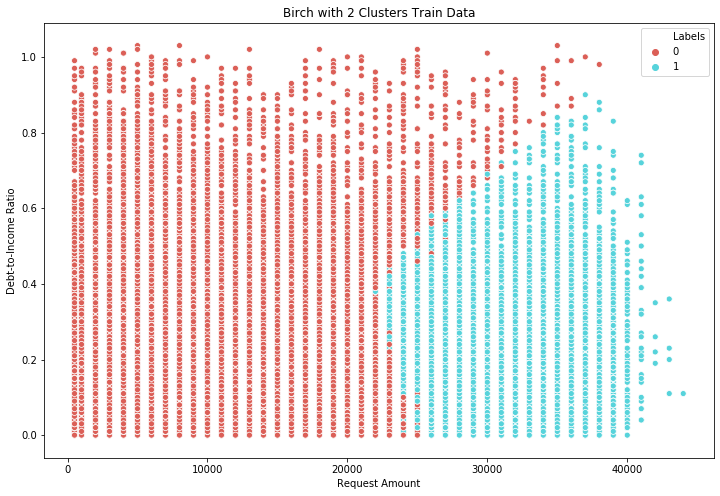

In [33]:
cluster0 = (94611/len(X_train)) * 100
cluster1 = (18115/len(X_train)) * 100
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)

train_3['Labels'] = birch.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_3['Request Amount'], train_3['Debt-to-Income Ratio'], hue=train_3['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('Birch with 2 Clusters Train Data')

In [34]:
score4 = silhouette_score(X_train, pred_4, metric='euclidean', random_state = 0)
score4

0.4106500836788993

In [35]:
pred_test_4 = birch.predict(X_test)
df_pred_test_4 = pd.DataFrame(pred_test_4, columns = ['Pred'])
df_pred_test_4['Pred'].value_counts()

0    31635
1     5941
Name: Pred, dtype: int64

The cluster plot of the test data below shows the same picture as the training data. Clusters labeled 0 are customers with lower Request Amounts. Cluster 1 are customers with high Request Amounts. 

Teat Cluster0 %: 84.18937619757291
Test Cluster1 %: 15.81062380242708


Text(0.5, 1.0, 'Birch with 2 Clusters Test Data')

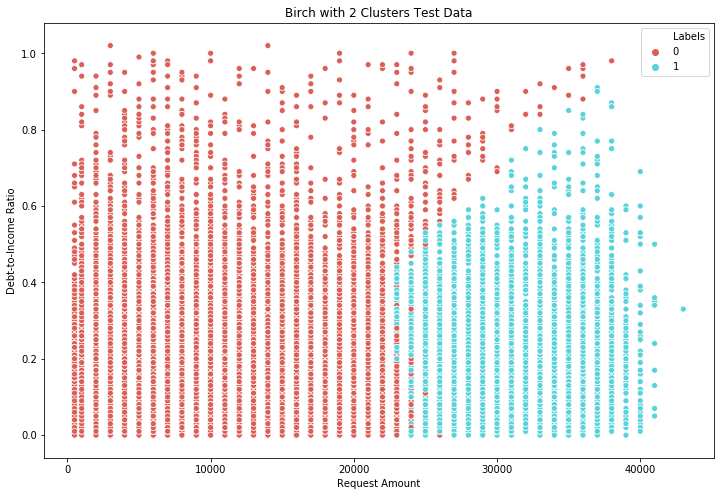

In [36]:
cluster0_test_4 = (31635/len(X_test)) * 100
cluster1_test_4 = (5941/len(X_test)) * 100
print('Teat Cluster0 %:', cluster0_test_4)
print('Test Cluster1 %:', cluster1_test_4)


test_3['Labels'] = pred_test_4
plt.figure(figsize=(12, 8))
sns.scatterplot(test_3['Request Amount'], test_3['Debt-to-Income Ratio'], hue=test_3['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('Birch with 2 Clusters Test Data')

In [37]:
score2_4 = silhouette_score(X_test, pred_test_4, metric='euclidean')
score2_4

0.4146968351259509

The average silhouette score shows that the three clusters are similar for the test and train data and the percentage of the data between the clusters are the same. This is the ideal outcome. The silhouette score points to the model providing some evidence of the reality of the clusters in the data. The silhouette score is the best out of the three models conducted. 

In [38]:
print('Average Silhouette Score')
print('Train:', score4)
print('Test:', score2_4)
print('--'*40)
print('Cluster %')
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Teat Cluster0 %:', cluster0_test_4)
print('Test Cluster1 %:', cluster1_test_4)


Average Silhouette Score
Train: 0.4106500836788993
Test: 0.4146968351259509
--------------------------------------------------------------------------------
Cluster %
Train Cluster0 %: 83.93006050068307
Train Cluster1 %: 16.069939499316927
Teat Cluster0 %: 84.18937619757291
Test Cluster1 %: 15.81062380242708


The mean and standard deviation show that the test and train data for each cluster are similar. Cluster 0 has a low debt-to-income ratio, low FICO Score, and a small Request Amount. Cluster 1 has a high debt-to-income ratio, high FICO Score, and a large Request Amount. 

In [39]:
print('Train')
print('Mean')
print(train_3.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(train_3.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))
print('--'*40)
print('Test')
print('Mean')
print(test_3.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(test_3.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))

Train
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.177646  670.616334    10210.308526
1                   0.213612  678.764284    30275.296715
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.136740   70.886139     6170.331478
1                   0.135067   59.429951     4567.589491
--------------------------------------------------------------------------------
Test
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.178106  670.993077    10209.088035
1                   0.214587  679.360040    30417.101498
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.136726   70.292732     6172.954626
1    

### Model 4

#### Threshold=0.3 with 3 Clusters and Branching factor of 1000

In [40]:
train_4 = X_train_1.copy()
test_4 = X_test_1.copy()
len(train_4), len(test_4)

(112726, 37576)

In [41]:
sc =  MinMaxScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

birch_1 = Birch(branching_factor=1000,threshold=0.3,n_clusters = 3, copy=True)
birch_1.fit(X_train)
pred_5 = birch_1.predict(X_train)

In [42]:
df_pred_5 = pd.DataFrame(pred_5, columns = ['Pred'])
df_pred_5['Pred'].value_counts()

0    86911
1    18115
2     7700
Name: Pred, dtype: int64

The cluster plot below shows clusters labeled 0 are customers with lower Request Amounts and a lower debt-to-income ratio. Cluster 1 are customers with high Request Amounts. Cluster 2 have low Request Amounts and high debt-to-income ratios.

Train Cluster0 %: 77.09933821833472
Train Cluster1 %: 16.069939499316927
Train Cluster2 %: 6.830722282348349


Text(0.5, 1.0, 'Birch with 3 Clusters Train Data')

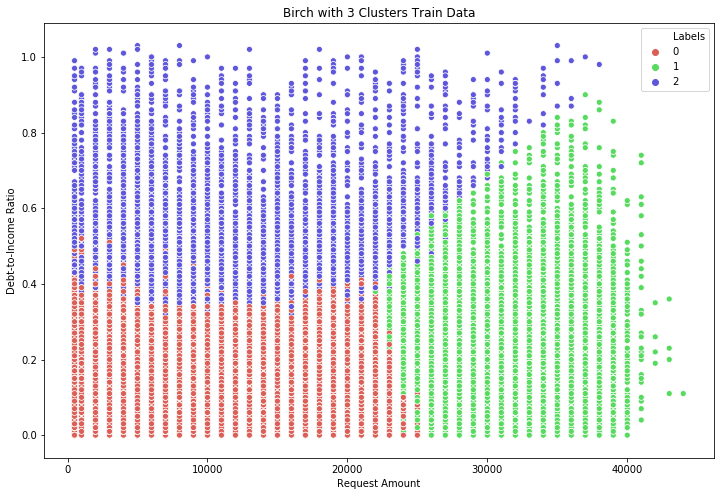

In [43]:
cluster0 = (86911/len(X_train)) * 100
cluster1 = (18115/len(X_train)) * 100
cluster2 = (7700/len(X_train)) * 100
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Train Cluster2 %:', cluster2)

train_4['Labels'] = birch_1.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_4['Request Amount'], train_4['Debt-to-Income Ratio'], hue=train_4['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Birch with 3 Clusters Train Data')

In [44]:
score5 = silhouette_score(X_train, pred_5, metric='euclidean', random_state = 0)
score5

0.33538725408972936

In [45]:
pred_test_5 = birch_1.predict(X_test)
df_pred_test_5 = pd.DataFrame(pred_test_5, columns = ['Pred'])
df_pred_test_5['Pred'].value_counts()

0    29010
1     5941
2     2625
Name: Pred, dtype: int64

The cluster plot below gives the same picture as the training data. Clusters labeled 0 are customers with lower Request Amounts and a lower debt-to-income ratio. Cluster 1 are customers with high Request Amounts. Cluster 2 have low Request Amounts and high debt-to-income ratios. 

Teat Cluster0 %: 77.20353417074729
Test Cluster1 %: 15.81062380242708
Teat Cluster2 %: 6.985842026825634


Text(0.5, 1.0, 'Birch with 3 Clusters Test Data')

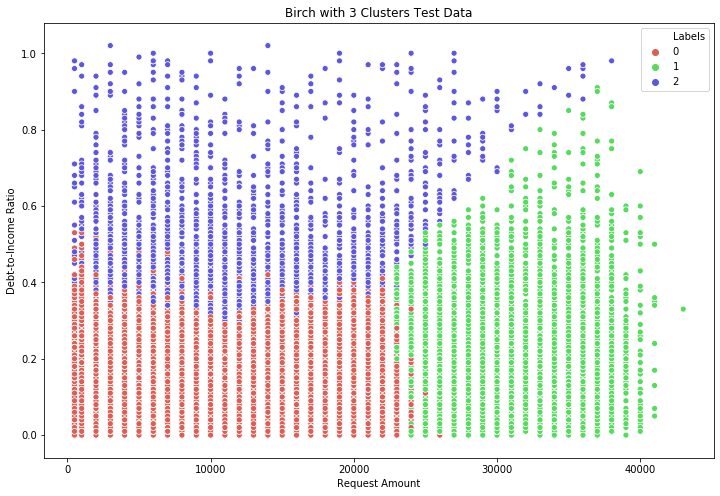

In [46]:
cluster0_test_5 = (29010/len(X_test)) * 100
cluster1_test_5 = (5941/len(X_test)) * 100
cluster2_test_5 = (2625/len(X_test)) * 100
print('Teat Cluster0 %:', cluster0_test_5)
print('Test Cluster1 %:', cluster1_test_5)
print('Teat Cluster2 %:', cluster2_test_5)



test_4['Labels'] = pred_test_5
plt.figure(figsize=(12, 8))
sns.scatterplot(test_4['Request Amount'], test_4['Debt-to-Income Ratio'], hue=test_4['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Birch with 3 Clusters Test Data')

In [47]:
score2_5 = silhouette_score(X_test, pred_test_5, metric='euclidean')
score2_5

0.33281416264866204

The average silhouette score shows that the three clusters are similar for the test and train data and the percentage of the data between the clusters are the same. This is the ideal outcome. The silhouette score points to the model providing some evidence of the reality of the clusters in the data. The silhouette score is not as high as the score for model 3, but it is right in line with the other two models. 

In [48]:
print('Average Silhouette Score')
print('Train:', score5)
print('Test:', score2_5)
print('--'*40)
print('Cluster %')
print('Train Cluster0 %:', cluster0)
print('Train Cluster1 %:', cluster1)
print('Train Cluster2 %:', cluster2)
print('Test Cluster0 %:', cluster0_test_4)
print('Test Cluster1 %:', cluster1_test_4)
print('Teat Cluster2 %:', cluster2_test_5)

Average Silhouette Score
Train: 0.33538725408972936
Test: 0.33281416264866204
--------------------------------------------------------------------------------
Cluster %
Train Cluster0 %: 77.09933821833472
Train Cluster1 %: 16.069939499316927
Train Cluster2 %: 6.830722282348349
Test Cluster0 %: 84.18937619757291
Test Cluster1 %: 15.81062380242708
Teat Cluster2 %: 6.985842026825634


The mean and standard deviation show that the test and train data for each cluster are similar. Cluster 0 has a low debt-to-income ratio, large FICO Score, and a small Request Amount. Cluster 1 has a high debt-to-income ratio, high FICO Score, and a large Request Amount. Cluster 2 has a high debt-to-income ratio, low FICO Score, and a small Request Amount.

In [49]:
print('Train')
print('Mean')
print(train_4.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(train_4.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))
print('--'*40)
print('Test')
print('Mean')
print(test_4.groupby(['Labels']).agg({'Debt-to-Income Ratio':'mean', 'FICO Score':'mean', 'Request Amount':'mean'}))
print('Standard Deviation')
print(test_4.groupby(['Labels']).agg({'Debt-to-Income Ratio':'std', 'FICO Score':'std', 'Request Amount':'std'}))

Train
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.148586  672.440968    10116.975987
1                   0.213612  678.764284    30275.296715
2                   0.505644  650.021429    11263.766234
Standard Deviation
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.089361   71.346019     6115.565242
1                   0.135067   59.429951     4567.589491
2                   0.149985   61.849275     6668.220385
--------------------------------------------------------------------------------
Test
Mean
        Debt-to-Income Ratio  FICO Score  Request Amount
Labels                                                  
0                   0.148867  672.836160    10097.604274
1                   0.214587  679.360040    30417.101498
2                   0.501234  650.624381    11441.142857
Standard Deviation
     

### Conclusion 

In [50]:
print('Average Silhouette Score')
print('Model 1')
print('Train:', score)
print('Test:', score2)
print('--'*40)
print('Model 2')
print('Train:', score3)
print('Test:', score2_3)
print('--'*40)
print('Model 3')
print('Train:', score4)
print('Test:', score2_4)
print('--'*40)
print('Model 4')
print('Train:', score5)
print('Test:', score2_5)

Average Silhouette Score
Model 1
Train: 0.3776932694478369
Test: 0.3803225093221911
--------------------------------------------------------------------------------
Model 2
Train: 0.3514686476689018
Test: 0.35429825037265256
--------------------------------------------------------------------------------
Model 3
Train: 0.4106500836788993
Test: 0.4146968351259509
--------------------------------------------------------------------------------
Model 4
Train: 0.33538725408972936
Test: 0.33281416264866204


In all four of the models the test data and train data were clustered the same. This is the ideal outcome when clustering data. But when it came to measuring how the model was doing clustering the data, all four models provided some evidence of the reality of the clusters in the data. The average silhouette score ranged from 0.33 to 0.41. It would be ideal to have it over 0.50. If I had to pick a model to use I would go with model 3, because of its higher average silhouette score.

### Kmeans model

When looking at the success that using two clusters had with the birch models a simple KMeans model was created for the same test and train data. The average silhouette score was right in the middle of the two birch models. Also, a silhouette plot was created to view the silhouette scores for all points. There are some negative silhouette scores for cluster 1 for both the test and train data which could be considered misclassified points.  

***Do to computing time a sample for both the train and test was taken. 

In [51]:
from sklearn.metrics import silhouette_samples
X = X_train[:25000, 0:3]

For n_clusters = 2 The average silhouette_score is : 0.3959424293020852
Train Cluster0 %: 67.852
Train Cluster1 %: 32.147999999999996


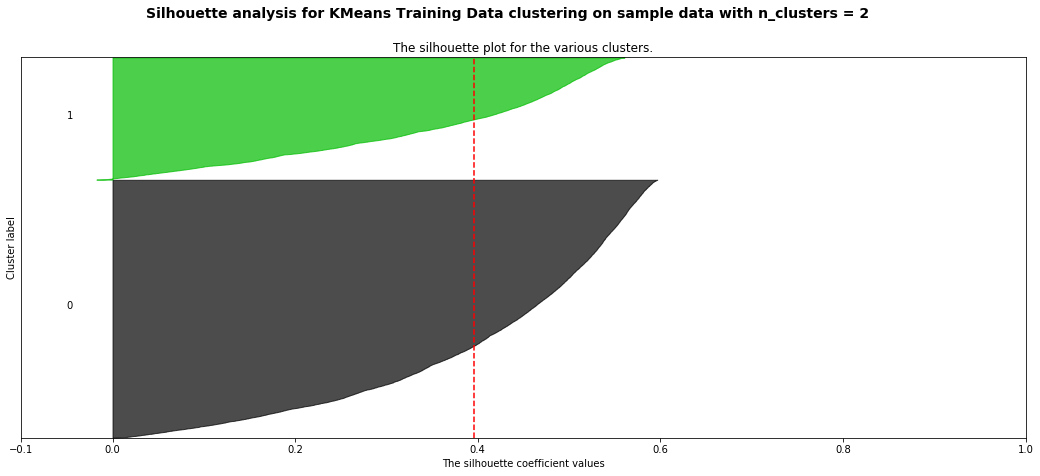

In [52]:
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    nc = n_clusters
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    cl = pd.DataFrame(cluster_labels, columns = ['labels'])
    zero = (cl['labels'].value_counts()[0] / len(cl['labels'])) * 100
    one = (cl['labels'].value_counts()[1] / len(cl['labels'])) * 100
    print('Train Cluster0 %:', zero)
    print('Train Cluster1 %:', one)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans Training Data clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [53]:
new_test = X_test[:15000, 0:3]

For n_clusters = 2 The average silhouette_score is : 0.39698052866947314
Train Cluster0 %: 68.47333333333333
Train Cluster1 %: 31.526666666666664


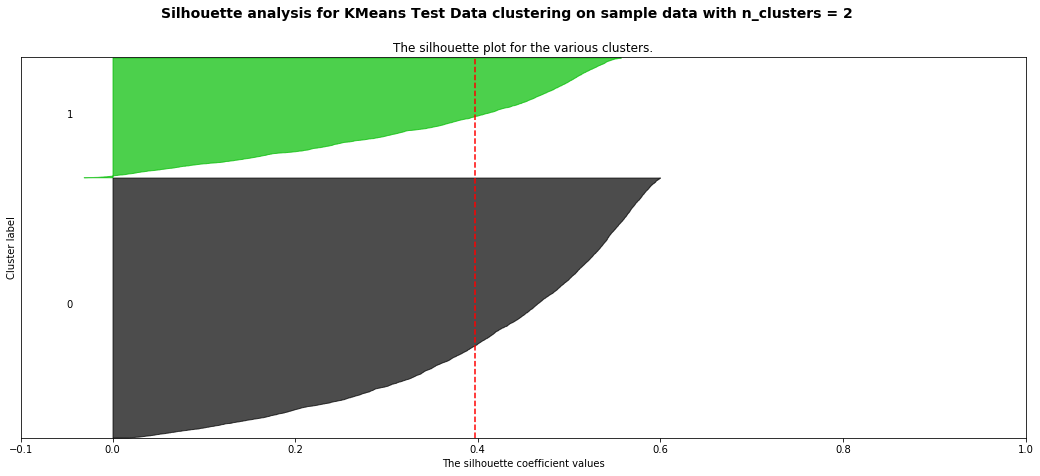

In [54]:
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    nc = n_clusters
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(new_test) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.predict(new_test)
    silhouette_avg = silhouette_score(new_test, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    cl = pd.DataFrame(cluster_labels, columns = ['labels'])
    zero = (cl['labels'].value_counts()[0] / len(cl['labels'])) * 100
    one = (cl['labels'].value_counts()[1] / len(cl['labels'])) * 100
    print('Train Cluster0 %:', zero)
    print('Train Cluster1 %:', one)

    sample_silhouette_values = silhouette_samples(new_test, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans Test Data clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')